In [188]:
# Dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

In [189]:
# Add files
experience_data = os.path.join("team_salary_experience.csv")
win_data = os.path.join("team_win_data.csv")
per_data = os.path.join("player_PER.csv")

In [190]:
# Read in experience_data csv file
experience_df = pd.read_csv(experience_data)
experience_df.head()

,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,roster_PL,...,roster_EX,roster_SAL,roster_CY,starter_PL,starter_HT (cm),starter_WT (kg),starter_AG,starter_EX,starter_SAL,starter_CY
0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,$4.2M,2.7,ATL,16,...,2.0,$4.2M,2.8,5,201.6,98.6,26.6,3.8,$10.7M,3.2
1,Boston Celtics,12,199.3,101.8,25.5,3.6,$6.8M,2.7,BOS,16,...,3.2,$7.2M,2.9,5,202.2,102.4,25.8,4.4,$12.3M,3.2
2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,$5.2M,2.2,BKN,15,...,3.7,$5.9M,2.4,5,199.2,94.4,25.4,3.8,$8.5M,2.6
3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,$9.5M,2.9,CHA,14,...,4.6,$8.4M,2.9,5,201.2,101.4,28.6,9.0,$16.8M,2.8
4,Chicago Bulls,17,200.7,98.4,24.8,2.4,$3.8M,2.8,CHI,15,...,2.7,$4.2M,3.0,5,203.0,99.4,25.4,3.0,$5.7M,3.4


In [191]:
experience_df.columns

Index(['TEAM', 'rotation_PL', 'rotation_HT (cm)', 'rotation_WT (kg)',
       'rotation_AG', 'rotation_EX', 'rotation_SAL', 'rotation_CY', 'Team_Abb',
       'roster_PL', 'roster_HT (cm)', 'roster_WT (kg)', 'roster_AG',
       'roster_EX', 'roster_SAL', 'roster_CY', 'starter_PL', 'starter_HT (cm)',
       'starter_WT (kg)', 'starter_AG', 'starter_EX', 'starter_SAL',
       'starter_CY'],
      dtype='object')

In [192]:
print(len(experience_df))

30


In [193]:
# Read in win_data csv file
win_df = pd.read_csv(win_data)
win_df.head()

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb
0,Toronto Raptors* (1),59,23,0.720,—,111.7,103.9,7.29,East,TOR
1,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East,BOS
2,Philadelphia 76ers* (3),52,30,0.634,7,109.8,105.3,4.30,East,PHI
3,Cleveland Cavaliers* (4),50,32,0.610,9,110.9,109.9,0.59,East,CLE
4,Indiana Pacers* (5),48,34,0.585,11,105.6,104.2,1.18,East,IND


In [194]:
win_df.columns

Index(['Team Name', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS',
       'conference', 'Team_Abb'],
      dtype='object')

In [195]:
print(len(win_df))

30


In [196]:
# Read in per_data csv file
per_df = pd.read_csv(per_data)
per_df.head()

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM
0,49.0,John Wall,41.0,34.4,0.515,29.7,11.9,30.3,1.8,10.2,6.0,19.20,172.5,5.8,WAS
1,56.0,Bradley Beal,82.0,36.3,0.564,16.7,9.6,26.8,2.3,11.5,6.9,18.51,355.7,11.9,WAS
2,57.0,Otto Porter Jr.,77.0,31.6,0.602,13.4,6.4,17.7,4.8,18.1,11.4,18.37,285.6,9.5,WAS
3,134.0,Tomas Satoransky,73.0,22.5,0.615,36.0,10.4,14.8,5.0,11.1,8.0,15.35,119.0,4.0,WAS
4,151.0,Marcin Gortat,82.0,25.3,0.546,17.1,11.2,15.2,9.9,24.0,17.0,14.70,127.0,4.2,WAS


In [197]:
per_df.columns

Index(['RK', 'PLAYER', 'GP', 'MPG', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR',
       'REBR', 'PER', 'VA', 'EWA', 'TEAM'],
      dtype='object')

In [198]:
# Rename TEAM column to Team_Abb
per_df = per_df.rename(columns={'TEAM': 'Team_Abb'})
per_df.head()

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,Team_Abb
0,49.0,John Wall,41.0,34.4,0.515,29.7,11.9,30.3,1.8,10.2,6.0,19.20,172.5,5.8,WAS
1,56.0,Bradley Beal,82.0,36.3,0.564,16.7,9.6,26.8,2.3,11.5,6.9,18.51,355.7,11.9,WAS
2,57.0,Otto Porter Jr.,77.0,31.6,0.602,13.4,6.4,17.7,4.8,18.1,11.4,18.37,285.6,9.5,WAS
3,134.0,Tomas Satoransky,73.0,22.5,0.615,36.0,10.4,14.8,5.0,11.1,8.0,15.35,119.0,4.0,WAS
4,151.0,Marcin Gortat,82.0,25.3,0.546,17.1,11.2,15.2,9.9,24.0,17.0,14.70,127.0,4.2,WAS


In [199]:
# Groupby Team_Abb and PER Score (calculate average team PER score)
team_per = per_df.groupby("Team_Abb")["PER"].mean()
team_per.head()

Team_Abb
ATL    13.528182
BKN    13.388182
BOS    13.978462
CHA    13.794167
CHI    12.400714
Name: PER, dtype: float64

In [200]:
print(len(team_per))

30


In [201]:
# Creating a new DataFrame for team_per
team_per_df = pd.DataFrame({"PER": team_per})

# Reset Index
team_per_df.reset_index(level=0, inplace=True)

team_per_df.head()

,Team_Abb,PER
0,ATL,13.528182
1,BKN,13.388182
2,BOS,13.978462
3,CHA,13.794167
4,CHI,12.400714


In [202]:
# Merge experience_df and win_df on Team_Abb
experience_win_merge = pd.merge(experience_df, win_df, on="Team_Abb")
experience_win_merge.head()

,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,roster_PL,...,starter_CY,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference
0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,$4.2M,2.7,ATL,16,...,3.2,Atlanta Hawks (15),24,58,0.293,35,103.4,108.8,-5.30,East
1,Boston Celtics,12,199.3,101.8,25.5,3.6,$6.8M,2.7,BOS,16,...,3.2,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East
2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,$5.2M,2.2,BKN,15,...,2.6,Brooklyn Nets (12),28,54,0.341,31,106.6,110.3,-3.67,East
3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,$9.5M,2.9,CHA,14,...,2.8,Charlotte Hornets (10),36,46,0.439,23,108.2,108.0,0.07,East
4,Chicago Bulls,17,200.7,98.4,24.8,2.4,$3.8M,2.8,CHI,15,...,3.4,Chicago Bulls (13),27,55,0.329,32,102.9,110.0,-6.84,East


In [203]:
print(len(experience_win_merge))

30


In [204]:
# Merge experience_win_merge and team_per_df on Team_Abb
ex_win_per_merge = pd.merge(experience_win_merge, team_per_df, on="Team_Abb")
ex_win_per_merge.head()

,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,roster_PL,...,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,PER
0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,$4.2M,2.7,ATL,16,...,Atlanta Hawks (15),24,58,0.293,35,103.4,108.8,-5.30,East,13.528182
1,Boston Celtics,12,199.3,101.8,25.5,3.6,$6.8M,2.7,BOS,16,...,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East,13.978462
2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,$5.2M,2.2,BKN,15,...,Brooklyn Nets (12),28,54,0.341,31,106.6,110.3,-3.67,East,13.388182
3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,$9.5M,2.9,CHA,14,...,Charlotte Hornets (10),36,46,0.439,23,108.2,108.0,0.07,East,13.794167
4,Chicago Bulls,17,200.7,98.4,24.8,2.4,$3.8M,2.8,CHI,15,...,Chicago Bulls (13),27,55,0.329,32,102.9,110.0,-6.84,East,12.400714


In [205]:
print(len(ex_win_per_merge))

30


In [206]:
ex_win_per_merge.columns

Index(['TEAM', 'rotation_PL', 'rotation_HT (cm)', 'rotation_WT (kg)',
       'rotation_AG', 'rotation_EX', 'rotation_SAL', 'rotation_CY', 'Team_Abb',
       'roster_PL', 'roster_HT (cm)', 'roster_WT (kg)', 'roster_AG',
       'roster_EX', 'roster_SAL', 'roster_CY', 'starter_PL', 'starter_HT (cm)',
       'starter_WT (kg)', 'starter_AG', 'starter_EX', 'starter_SAL',
       'starter_CY', 'Team Name', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G',
       'SRS', 'conference', 'PER'],
      dtype='object')

In [207]:
# Groupby Team_Abb and rotation_EX (calculate average team experience in years)
rotation_ex = ex_win_per_merge.groupby("Team_Abb")["rotation_EX"].mean()
rotation_ex.head()

Team_Abb
ATL    1.6
BKN    3.4
BOS    3.6
CHA    5.1
CHI    2.4
Name: rotation_EX, dtype: float64

In [208]:
# Groupby Team_Abb and roster_EX (calculate average team experience in years)
roster_ex = ex_win_per_merge.groupby("Team_Abb")["roster_EX"].mean()
roster_ex.head()

Team_Abb
ATL    2.0
BKN    3.7
BOS    3.2
CHA    4.6
CHI    2.7
Name: roster_EX, dtype: float64

In [209]:
# Groupby Team_Abb and starter_EX (calculate average team experience in years)
starter_ex = ex_win_per_merge.groupby("Team_Abb")["starter_EX"].mean()
starter_ex.head()

Team_Abb
ATL    3.8
BKN    3.8
BOS    4.4
CHA    9.0
CHI    3.0
Name: starter_EX, dtype: float64

In [210]:
# Groupby Team_Abb and Wins ('W')
team_total_wins = ex_win_per_merge.groupby("Team_Abb")["W"].max()
team_total_wins.head()

Team_Abb
ATL    24
BKN    28
BOS    55
CHA    36
CHI    27
Name: W, dtype: int64

In [211]:
# Creating a new DataFrame for team_per
experience_summary_df = pd.DataFrame({"rotation_EX": rotation_ex,
                                     "roster_EX": roster_ex,
                                     "starter_EX": starter_ex,
                                     "W": team_total_wins})

# Reset Index
experience_summary_df.reset_index(level=0, inplace=True)

experience_summary_df.head()

,Team_Abb,W,roster_EX,rotation_EX,starter_EX
0,ATL,24,2.0,1.6,3.8
1,BKN,28,3.7,3.4,3.8
2,BOS,55,3.2,3.6,4.4
3,CHA,36,4.6,5.1,9.0
4,CHI,27,2.7,2.4,3.0


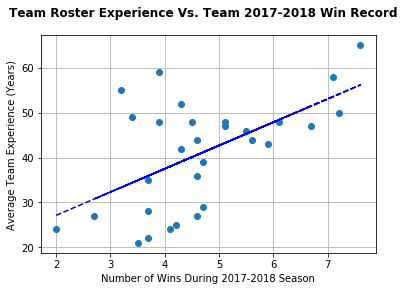

In [219]:
# CREATE GRAPH: ROSTER VS. WINS
# There seems to be a somewhat positive correlation between average roster experience in years and wins
# However, there seems to be more of a impact when a team is on the lower and higher end of the spectrum of average experience.
# Set line
(slope, intercept, _, _, _) = linregress(experience_summary_df["roster_EX"], experience_summary_df["W"])
fit = slope * experience_summary_df["roster_EX"] + intercept

# Add best fit line
fig, ax = plt.subplots()

fig.suptitle("Team Roster Experience Vs. Team 2017-2018 Win Record", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Wins During 2017-2018 Season")
ax.set_ylabel("Average Team Experience (Years)")

ax.plot(experience_summary_df["roster_EX"], experience_summary_df["W"], linewidth=0, marker='o')
ax.plot(experience_summary_df["roster_EX"], fit, 'b--')
plt.grid()

# Save an image of the chart
plt.savefig("roster_vs_wins.png")

plt.show()

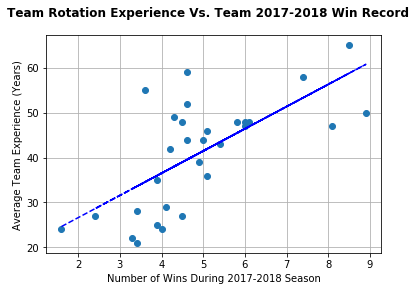

In [220]:
# CREATE GRAPH ROTATION VS. WINS
# There seems to be a positive correlation between average team experience in years and win record. 
# The more average experience in years a team has the more likey they are to win 
# This suggests that the starters can't do it all themselves and the players off the bench make an impact on win record.
# This suggests that there doesn't seem to be a difference in winning until average team experience is above 5 years.

# Set line
(slope, intercept, _, _, _) = linregress(experience_summary_df["rotation_EX"], experience_summary_df["W"])
fit = slope * experience_summary_df["rotation_EX"] + intercept

# Add best fit line
fig, ax = plt.subplots()

fig.suptitle("Team Rotation Experience Vs. Team 2017-2018 Win Record", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Wins During 2017-2018 Season")
ax.set_ylabel("Average Team Experience (Years)")

ax.plot(experience_summary_df["rotation_EX"], experience_summary_df["W"], linewidth=0, marker='o')
ax.plot(experience_summary_df["rotation_EX"], fit, 'b--')
plt.grid()

# Save an image of the chart
plt.savefig("rotation_vs_wins.png")

plt.show()

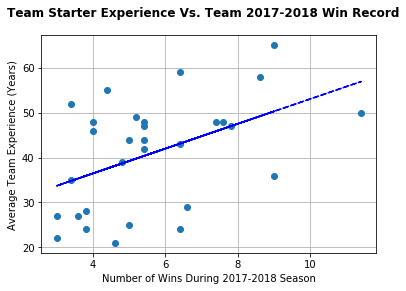

In [221]:
# CREATE GRAPH STARTER VS. WINS
# There doesn't seem to be a correlation between the starters average experience level per team and the teams win record.
# This suggests that the starters on all 30 NBA teams are pretty evenly distributed experience wise.

# Set line
(slope, intercept, _, _, _) = linregress(experience_summary_df["starter_EX"], experience_summary_df["W"])
fit = slope * experience_summary_df["starter_EX"] + intercept

# Add best fit line
fig, ax = plt.subplots()

fig.suptitle("Team Starter Experience Vs. Team 2017-2018 Win Record", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Wins During 2017-2018 Season")
ax.set_ylabel("Average Team Experience (Years)")

ax.plot(experience_summary_df["starter_EX"], experience_summary_df["W"], linewidth=0, marker='o')
ax.plot(experience_summary_df["starter_EX"], fit, 'b--')
plt.grid()

# Save an image of the chart
plt.savefig("starter_vs_wins.png")

plt.show()